In [39]:
test_str="""
```cypher
CREATE (Company:Organization {name: 'NoOffice AS', focusAreas: ['Digital Transformation', 'Artificial Intelligence', 'Demographic Changes', 'Sustainable Development Goals'], primaryMarketAreas: ['Clean Water and Sewage', 'Clean Energy', 'Sustainable Cities']})
CREATE (SustainabilityGoal1:UNSDG {name: 'Clean Water and Sewage'})
CREATE (SustainabilityGoal2:UNSDG {name: 'Clean Energy'})
CREATE (SustainabilityGoal3:UNSDG {name: 'Sustainable Cities'})
CREATE (SustainabilityGoal4:UNSDG {name: 'Good Health and Well-being'})
CREATE (SustainabilityGoal5:UNSDG {name: 'Gender Equality'})
CREATE (SustainabilityGoal6:UNSDG {name: 'Partnerships for the Goals'})
CREATE (IsoEnsure:Technology {name: 'IsoEnsure', description: 'AI Engine'})
CREATE (DigitalTransformation:ChangeDriver {name: 'Digital Transformation'})
CREATE (AI:ChangeDriver {name: 'Artificial Intelligence Impact'})
CREATE (DemographicChange:ChangeDriver {name: 'Demographic Change'})
CREATE (GlobalUnrest:ChangeDriver {name: 'Global Unrest'})
CREATE (ProductivityImprovement:Goal {name: 'Administrative Cost Reduction', targetPercentage: 50, status: '2030 target'})
CREATE (RevenueGrowth:FinancialMetric {year: 2030, revenueTarget: 156})
CREATE (ProfitBeforeTax:FinancialMetric {year: 2030, profitTarget: 129})
CREATE (KeyPartner1:Partner {name: 'Atea ASA', sector: 'IT'})
CREATE (KeyPartner2:Partner {name: 'PC-Support AS', sector: 'IT Support'})
CREATE (CustomerSegment1:CustomerSegment {segment: 'SMBs', focusArea: 'Innovation and Quality Improvement'})
CREATE (CoreActivity1:CoreActivity {activity: 'Strategic and Operational Support'})
CREATE (CoreActivity2:CoreActivity {activity: 'Innovation and Business Development'})
CREATE (CoreActivity3:CoreActivity {activity: 'Administrative Support Functions'})
CREATE (RevenueStream1:RevenueStream {name: 'Service Delivery'})
CREATE (RevenueStream2:RevenueStream {name: 'Automated Digital Services'})
CREATE (RevenueStream3:RevenueStream {name: 'KI Engine Licensing'})
CREATE (SME:Customer {name: 'Generic SME Customer', needs: ['Digital Transformation Support', 'Administrative Cost Reduction', 'Innovation']})
CREATE (InvestmentOpportunity:InvestmentOpportunity {name: 'Investment Growth', projectedAnnualGrowth: 50})
MERGE (Company)-[:TARGETS]->(SDG1)
MERGE (Company)-[:TARGETS]->(SDG2)
MERGE (Company)-[:TARGETS]->(SDG3)
MERGE (Company)-[:PRIORITIZES]->(SDG4)
MERGE (Company)-[:PRIORITIZES]->(SDG5)
MERGE (Company)-[:PRIORITIZES]->(SDG6)
MERGE (Company)-[:DEVELOPED]->(IsoEnsure)
MERGE (Company)-[:FACES]->(DigitalTransformation)
MERGE (Company)-[:FACES]->(AI)
MERGE (Company)-[:FACES]->(DemographicChange)
MERGE (Company)-[:FACES]->(GlobalUnrest)
MERGE (Company)-[:SETS_GOAL]->(ProductivityImprovement)
MERGE (Company)-[:AIMS_TO_ACHIEVE]->(RevenueGrowth)
MERGE (Company)-[:AIMS_TO_ACHIEVE]->(ProfitBeforeTax)
MERGE (Company)-[:PARTNERS_WITH]->(KeyPartner1)
MERGE (Company)-[:PARTNERS_WITH]->(KeyPartner2)
MERGE (Company)-[:TARGETS]->(CustomerSegment1)
MERGE (Company)-[:PERFORMS]->(CoreActivity1)
MERGE (Company)-[:PERFORMS]->(CoreActivity2)
MERGE (Company)-[:PERFORMS]->(CoreActivity3)
MERGE (Company)-[:GENERATES]->(RevenueStream1)
MERGE (Company)-[:GENERATES]->(RevenueStream2)
MERGE (Company)-[:GENERATES]->(RevenueStream3)
MERGE (Company)-[:SERVES]->(SME)
MERGE (Company)-[:OFFERS]->(InvestmentOpportunity)
```
"""

In [40]:
# check if string contains ```cypher 

if "```cypher" in test_str:
    # print the line starting with CREATE
    lines_that_strt_with_create = [line for line in test_str.split("\n") if line.startswith("CREATE")]
    node_data = []  
    for line in lines_that_strt_with_create:

        node_data.append(line.split("(")[1].split("{")[0])
    
        
    lines_that_strt_with_merge = [line for line in test_str.split("\n") if line.startswith("MERGE")]
for line in lines_that_strt_with_merge:
    print (line)
    firstEntity = line.split("(")[1].split(")")[0]
    secondEntity = line.split("(")[2].split(")")[0]
    # relation is between [ and ]
    relationship = line.split("[")[1].split("]")[0]
    print(f"relationship: {relationship} \nfirstEntity: {firstEntity} \nsecondEntity: {secondEntity}")


MERGE (Company)-[:TARGETS]->(SDG1)
relationship: :TARGETS 
firstEntity: Company 
secondEntity: SDG1
MERGE (Company)-[:TARGETS]->(SDG2)
relationship: :TARGETS 
firstEntity: Company 
secondEntity: SDG2
MERGE (Company)-[:TARGETS]->(SDG3)
relationship: :TARGETS 
firstEntity: Company 
secondEntity: SDG3
MERGE (Company)-[:PRIORITIZES]->(SDG4)
relationship: :PRIORITIZES 
firstEntity: Company 
secondEntity: SDG4
MERGE (Company)-[:PRIORITIZES]->(SDG5)
relationship: :PRIORITIZES 
firstEntity: Company 
secondEntity: SDG5
MERGE (Company)-[:PRIORITIZES]->(SDG6)
relationship: :PRIORITIZES 
firstEntity: Company 
secondEntity: SDG6
MERGE (Company)-[:DEVELOPED]->(IsoEnsure)
relationship: :DEVELOPED 
firstEntity: Company 
secondEntity: IsoEnsure
MERGE (Company)-[:FACES]->(DigitalTransformation)
relationship: :FACES 
firstEntity: Company 
secondEntity: DigitalTransformation
MERGE (Company)-[:FACES]->(AI)
relationship: :FACES 
firstEntity: Company 
secondEntity: AI
MERGE (Company)-[:FACES]->(DemographicCh

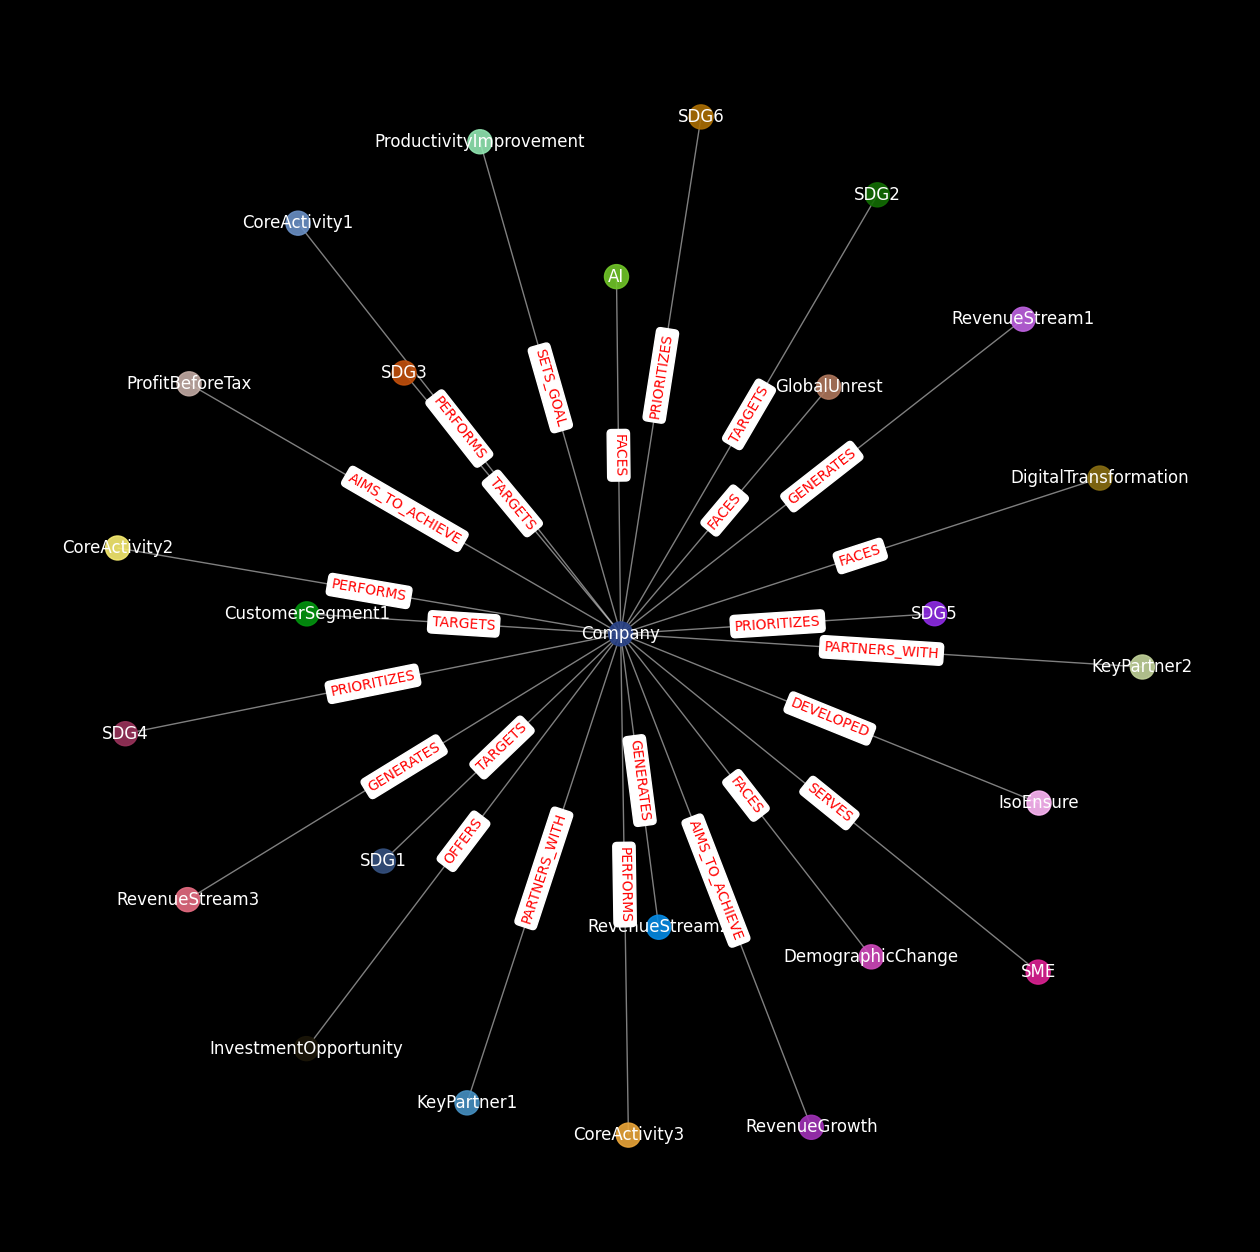

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import random


data = test_str

if "```cypher" in data:
    lines_that_start_with_merge = [line for line in data.split("\n") if line.startswith("MERGE")]
    G = nx.Graph()
    
    for line in lines_that_start_with_merge:
        # Using regular expressions to extract node and relationship information
        entities = re.findall(r"\((.*?)\)", line)
        relationship = re.search(r"\[(.*?)\]", line)
        
        if entities and relationship and len(entities) >= 2:
            # Extract the first and second entity names
            firstEntity = entities[0]
            secondEntity = entities[1]
            relationshipType = relationship.group(1).split(":")[1] if ':' in relationship.group(1) else relationship.group(1)
            
            # Add nodes and edge with relationship type as label
            G.add_node(firstEntity)
            G.add_node(secondEntity)
            G.add_edge(firstEntity, secondEntity, label=relationshipType)
    
    # Generate positions for each node using the spring layout for aesthetics
    pos = nx.spring_layout(G)
    
    # Generate random colors for nodes
    colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in G.nodes()]
    
    # Visualization
    plt.figure(figsize=(16, 16), facecolor='black')
    nx.draw_networkx_nodes(G, pos, node_color=colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='white', alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_color='white',)
    
    # Optionally, draw edge labels to show relationship types
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.axis('off')

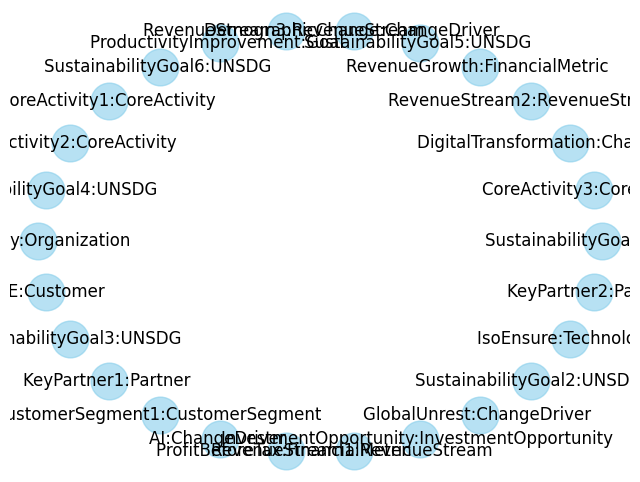

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your list looks something like this, with each item being a unique entity
data = set(node_data)

# Create a new graph
G = nx.Graph()
G.add_nodes_from(data)

# Choose a layout
# pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm.
# pos = nx.circular_layout(G)  # Positions nodes in a circle.
pos = nx.kamada_kawai_layout(G)  # Positions nodes in concentric circles.

# Visualization
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.6)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()


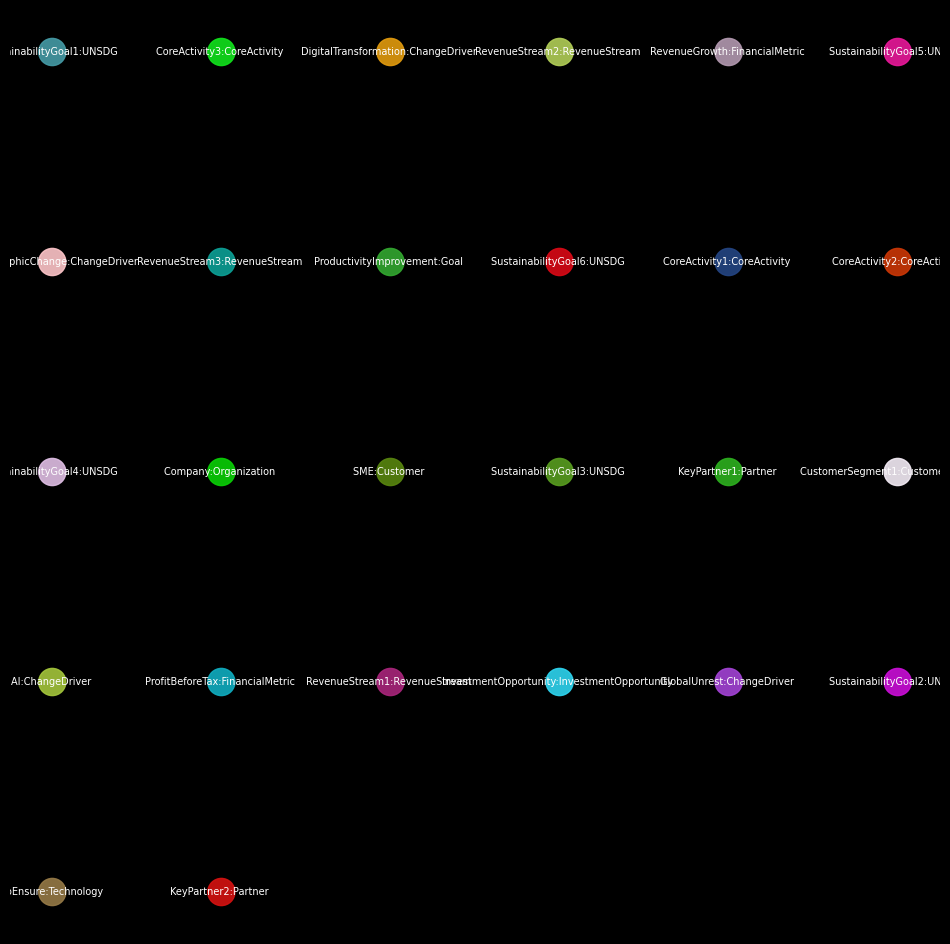

In [43]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import random

def draw_graph_in_grid_layout(data):
    G = nx.Graph()
    G.add_nodes_from(data)
    
    # Calculate grid size
    num_nodes = len(data)
    grid_size = math.ceil(math.sqrt(num_nodes))  # Square grid size
    spacing = 1  # Spacing between nodes
    
    # Calculate node positions
    pos = {}
    for i, node in enumerate(G.nodes()):
        row = i // grid_size
        col = i % grid_size
        pos[node] = (col * spacing, -row * spacing)  # Negative row to display from top to bottom
    
    # Adjust node size for visibility
    node_size = max(100, 10000 // num_nodes)  # Adjust this formula as needed
    font_size = max(7, 16 // grid_size)  # Adjust this formula as needed

    # Generate random colors for nodes
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_nodes)]
    
    # Visualization
    plt.figure(figsize=(12, 12), facecolor='black')
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=colors, alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=font_size,font_color='white')
    plt.axis('off')
    # plt.title("Graph in Grid Layout with Random Colors")
    plt.show()

# Example usage
data = set(node_data)
draw_graph_in_grid_layout(data)



In [44]:
def main():
    st.title("Relationship Extractor with Streamlit")

    # Text area for user to input conversation data
    conversation_data = st.text_area("Enter conversation data:", "Person A: Hello\nPerson B: Hi, Person A! How are you?\nPerson C: Greetings, Person B and A!")

    # Button to process the conversation data
    if st.button("Extract Relationships"):
        # Use the extract_relationship function to process the input data
        relationships = extract_relationship(conversation_data)

        # Prepare nodes and edges for streamlit-agraph
        nodes = []
        edges = []
        node_ids = set()
        for source, target in relationships:
            if source not in node_ids:
                nodes.append(Node(id=source, label=source))
                node_ids.add(source)
            if target not in node_ids:
                nodes.append(Node(id=target, label=target))
                node_ids.add(target)
            edges.append(Edge(source=source, target=target, type="CURVE_SMOOTH"))

        # Config for the graph
        config = {
            "height": 400,
            "width": 400,
            "directed": False,
            "nodeHighlightBehavior": True,
            "highlightColor": "#F7A7A6",  # or any color you like
        }

        # Display the graph
        agraph(nodes=nodes, edges=edges, config=config)
